<a href="https://colab.research.google.com/github/abhishektripathi66/RecomendationSystem/blob/main/next_word_predictor_using_lstms_tensorflow_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      S

In [123]:
text = """
Panel-id show? = PANELID
Message-id = MSGID

REFLIST
REFLISTD
REFLISTL
REFACTD
REFACTL
REFOPEND
REFOPENL
REFADDD
REFADDL
RETP
RETF
RETRIEVE
CRETRIEV
ISRDDN
XMIT
RECEIVE
DSLIST
SAVE /VDL
QPRINT
TSO PROFILE
CUT DISPLAY
KEYLIST
KEYS
PFSHOW
SCRNAME ON
SWAP LIST

ASM
CALC
COBOL
FORT

CALL
LINK
LOADGO
RUN
TEST
TESTAUTH

ALLOCATE
ALTLIB
ATTRIB
CONVERT
COPY
DELETE
EDIT
FORMAT
FREE
LIST
LISTALC
LISTBC
LISTCAT
LISTDS
MERGE
PRINTDS
PROTECT
RENAME
TSOLIB

ACCOUNT
CONSOLE
OPERATOR
PARMLIB
RACONVRT
SYNC
CONSPROF
EXEC
EXECUTIL
HELP
LOGOFF
LOGON
PROFILE
SEND
TERMINAL
TIME
TSOEXEC
WHEN
CANCEL
OUTPUT
STATUS
SUBMIT
INTERACTIVE
RECEIVE
TRANSMIT
"""

# let's perform some **preprocessing** on text...

In [124]:
import re

# Lowercasing the text
lowercase_text = text.lower()

# Removing extra newlines between sentences
cleaned_text = re.sub(r'\n\s*\n', '\n', lowercase_text)

print("Lowercased Text with Extra Newlines Removed:\n")
print(cleaned_text)

Lowercased Text with Extra Newlines Removed:


panel-id show? = panelid
message-id = msgid
reflist
reflistd
reflistl
refactd
refactl
refopend
refopenl 
refaddd
refaddl
retp
retf
retrieve
cretriev
isrddn
xmit
receive
dslist
save /vdl
qprint
tso profile
cut display
keylist
keys
pfshow
scrname on
swap list
asm
calc
cobol
fort
call
link
loadgo
run
test
testauth
allocate
altlib
attrib
convert
copy
delete
edit
format
free
list
listalc
listbc
listcat
listds
merge
printds
protect
rename
tsolib
account
console
operator
parmlib
raconvrt
sync
consprof
exec
executil
help
logoff
logon
profile
send
terminal
time
tsoexec
when
cancel
output
status
submit
interactive
receive
transmit



In [125]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [126]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])

# to see, what numbers are allocated to what words, there's an attribute name "word_index"

In [127]:
tokenizer.word_index

{'id': 1,
 'receive': 2,
 'profile': 3,
 'list': 4,
 'panel': 5,
 'show': 6,
 'panelid': 7,
 'message': 8,
 'msgid': 9,
 'reflist': 10,
 'reflistd': 11,
 'reflistl': 12,
 'refactd': 13,
 'refactl': 14,
 'refopend': 15,
 'refopenl': 16,
 'refaddd': 17,
 'refaddl': 18,
 'retp': 19,
 'retf': 20,
 'retrieve': 21,
 'cretriev': 22,
 'isrddn': 23,
 'xmit': 24,
 'dslist': 25,
 'save': 26,
 'vdl': 27,
 'qprint': 28,
 'tso': 29,
 'cut': 30,
 'display': 31,
 'keylist': 32,
 'keys': 33,
 'pfshow': 34,
 'scrname': 35,
 'on': 36,
 'swap': 37,
 'asm': 38,
 'calc': 39,
 'cobol': 40,
 'fort': 41,
 'call': 42,
 'link': 43,
 'loadgo': 44,
 'run': 45,
 'test': 46,
 'testauth': 47,
 'allocate': 48,
 'altlib': 49,
 'attrib': 50,
 'convert': 51,
 'copy': 52,
 'delete': 53,
 'edit': 54,
 'format': 55,
 'free': 56,
 'listalc': 57,
 'listbc': 58,
 'listcat': 59,
 'listds': 60,
 'merge': 61,
 'printds': 62,
 'protect': 63,
 'rename': 64,
 'tsolib': 65,
 'account': 66,
 'console': 67,
 'operator': 68,
 'parmlib':

# now we'll try to create a dataset from this text as a supervised learning task dataset, where there's an input and an output
> ### for ex. if text = "How are you all?"
===========================================
> ### Input: **How**
> ### Output: **are**
===========================================
> ### Input: **How are**
> ### Output: **you** and so on...

In [128]:
input_sequences = []
for sentence in cleaned_text.split("\n"):
    # convert words into numbers
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    print(tokenized_sentence)

    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

[]
[5, 1, 6, 7]
[8, 1, 9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[2]
[25]
[26, 27]
[28]
[29, 3]
[30, 31]
[32]
[33]
[34]
[35, 36]
[37, 4]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[4]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[3]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[2]
[88]
[]


# the input shape must be same when passing the sequences into the neural networks, so for that we will applying **padding** in front of every sentence with respect to which sentence has max. number of words.

In [129]:
max_length = max([len(x) for x in input_sequences])
max_length # there present a sentence which has maximum 111 words.

4

# now we'll apply **zero_padding**

In [130]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [131]:
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding='pre')

In [132]:
padded_input_sequences

array([[ 0,  0,  5,  1],
       [ 0,  5,  1,  6],
       [ 5,  1,  6,  7],
       [ 0,  0,  8,  1],
       [ 0,  8,  1,  9],
       [ 0,  0, 26, 27],
       [ 0,  0, 29,  3],
       [ 0,  0, 30, 31],
       [ 0,  0, 35, 36],
       [ 0,  0, 37,  4]], dtype=int32)

In [146]:
X = input_sequences[:-1]
y = input_sequences[:]

In [147]:
X

[[5, 1],
 [5, 1, 6],
 [5, 1, 6, 7],
 [8, 1],
 [8, 1, 9],
 [26, 27],
 [29, 3],
 [30, 31],
 [35, 36]]

In [150]:
y

[[5, 1],
 [5, 1, 6],
 [5, 1, 6, 7],
 [8, 1],
 [8, 1, 9],
 [26, 27],
 [29, 3],
 [30, 31],
 [35, 36],
 [37, 4]]

# now from our dataset (X and y), as we have **discrete values**, we can use **multi-class classification.**

In [149]:
X.shape, y.shape

AttributeError: 'list' object has no attribute 'shape'

> #### X.shape = (1478, 110) => means **in each sentence there are 110 words** and there are **total 1478 sentences**.

# now we'll **ONE HOT ENCODE** the y, which is currently a scaler.

In [137]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)
# +1 because OHE starts from 0 and word_index returned output started from 1

In [138]:
y.shape     # (1478, 535), 535 because there are total 535 words in our vocabulary.

(10, 89)

In [139]:
 y_rows, y_cols = y.shape

In [140]:
y   # each sentence is represented by a sparse vector having 535 values

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# Now we're reading with **TRAINING THE DATA**

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SimpleRNN, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Ftrl, Nadam, Adamax
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy, mean_squared_error, mean_absolute_error, huber, logcosh, poisson, cosine_similarity
# from tensorflow.keras.metrics import accuracy, binary_accuracy, categorical_accuracy, top_k_categorical_accuracy, sparse_categorical_accuracy, mean_io_u, precision

In [143]:
hidden_units = 256
activation1 = 'softmax'
model = Sequential()
model.add(Embedding(input_dim=y_cols, output_dim=max_length))
# there are total 535 words in our vocabulary and 110 is the length of each sentence
# model.add(LSTM(units=256))
model.add(GRU(hidden_units, input_shape=y.shape))
# model.add(Dense(units=y_cols, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(y_cols, activation='softplus'))
# model.add(Dropout(0.2))
model.add(Dense(y_cols, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(y_cols, activation='swish'))
# model.add(Dropout(0.2))
model.add(Dense(units=y_cols, activation='softmax'))

model.compile(loss='cosine_similarity',
              optimizer=Adamax(learning_rate=0.01),
              metrics=['cosine_similarity'])

early_stopping = EarlyStopping(monitor="cosine_similarity", patience=100, restore_best_weights=True)
history = model.fit(X, y, epochs=200, callbacks=[early_stopping])

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - cosine_similarity: 0.1051 - loss: -0.1051
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - cosine_similarity: 0.2413 - loss: -0.2413
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - cosine_similarity: 0.2939 - loss: -0.2939
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - cosine_similarity: 0.3262 - loss: -0.3262
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - cosine_similarity: 0.3133 - loss: -0.3133
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - cosine_similarity: 0.3164 - loss: -0.3164
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - cosine_similarity: 0.3316 - loss: -0.3316
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - cosine_similarity: 0.3358 - loss: -0.3358
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - cosine_similarity: 0.3340 - loss: -0.3340
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - cosine_similarity: 0.3336 - loss: -0.3336
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - cosin

# Knowing the summary of the model...

In [151]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ (None, 3, 4)                │             356 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_17 (GRU)                         │ (None, 256)                 │         201,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 89)                  │          22,873 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 89)                  │           8,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 89)                  │           8,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 89)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 745,427 (2.84 MB)

 Trainable params: 248,475 (970.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 496,952 (1.90 MB)

# Let's plot accuracy v/s loss curve

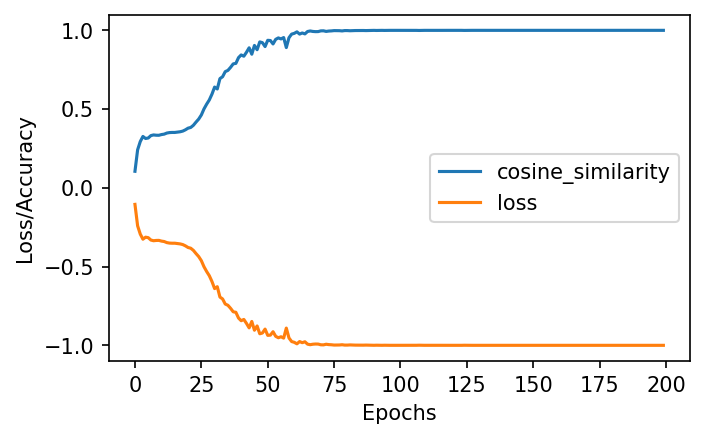

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

plot_1 = pd.DataFrame(history.history)
plt.figure(dpi=150, figsize = (5,3))
plt.plot(plot_1)
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(plot_1)

# Finally let's watch the output on giving **LLMs are** as an input...

In [ ]:
import numpy as np
import time

In [153]:
text = "LLMs are"

for i in range(6):
    previousword = text.split(" ")[-1]
    # tokenize
    token_text = tokenizer.texts_to_sequences([text])[0]
    print(token_text)
    # padding
    padded_token_text = pad_sequences([token_text], maxlen=max_length, padding='pre')
    print(padded_token_text)
    # predict
    position = np.argmax(model.predict(padded_token_text))

    # print word at the particular position in tokenizer.word_index
    for word, index in tokenizer.word_index.items():
        if index == position:
            text = text + " " + word
            print(text)
            time.sleep(2)

[]
[[0 0 0 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
LLMs are on
[36]
[[ 0  0  0 36]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
LLMs are on id
[36, 1]
[[ 0  0 36  1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
LLMs are on id id
[36, 1, 1]
[[ 0 36  1  1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
LLMs are on id id panelid
[36, 1, 1, 7]
[[36  1  1  7]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LLMs are on id id panelid panelid
[36, 1, 1, 7, 7]
[[1 1 7 7]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LLMs are on id id panelid panelid panelid


# I think it's performing well :)